In [1]:
conda upgrade -c conda-forge lightgbm

Solving environment: done

## Package Plan ##

  environment location: /Users/isaosugawara/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-client-1.12.1     |     pyhd8ed1ab_1          73 KB  conda-forge
    anaconda-cloud-auth-0.1.4  |     pyhd8ed1ab_0          19 KB  conda-forge
    anaconda-project-0.11.1    |     pyhd8ed1ab_0         225 KB  conda-forge
    anyio-4.0.0                |     pyhd8ed1ab_0          97 KB  conda-forge
    appnope-0.1.3              |     pyhd8ed1ab_0           8 KB  conda-forge
    argon2-cffi-23.1.0         |     pyhd8ed1ab_0          18 KB  conda-forge
    argon2-cffi-bindings-21.2.0|   py39hdc70f33_4          31 KB  conda-forge
    arrow-1.3.0                |     pyhd8ed1ab_0          98 KB  conda-forge
    asttokens-2.4.0            |     pyhd8ed1ab_0          28 KB  conda-forge
    as

In [2]:
import pandas as pd
import sweetviz as sv
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# increase column number display in pandas
pd.set_option('display.max_columns', 100)

def read_csv():
    # read csv and parse dates column to datetime
    df = pd.read_csv("loan.csv", parse_dates=['issue_d'])
    return df

def make_train_test(df):
    # split data to train and test
    sorted_df = df[df['loan_status'] != 'Current'].reset_index(drop=True)
    sorted_df["loan_status"] = sorted_df["loan_status"].map({"Fully Paid": 0, "Charged Off": 1})
    X = sorted_df.drop('loan_status', axis=1)
    y = sorted_df['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train.reset_index(drop=True,inplace=True)
    X_test.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    return X_train, X_test, y_train, y_test
    

df = read_csv()
df_train, df_test, df_train_y, df_test_y = make_train_test(df)

# # check data by sweetviz
# my_report = sv.analyze(df_train)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

df_train.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1038889,1268820,15000,15000,14950.0,36 months,13.49%,508.96,C,C1,Pepsi Beverage Company,4 years,RENT,60000.0,Verified,Nov-11,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,Wedding 8/12/12,108xx,NY,18.18,0,Jan-03,2,NaN,NaN,9,0,10532,72.70%,19,f,0.0,0.0,18322.420010,18261.35,15000.0,3322.42,0.0,0.0,0.0,Jan-15,532.52,NaN,Apr-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,797614,1002630,4000,4000,4000.0,36 months,11.49%,131.89,B,B4,Dillard's,5 years,RENT,40000.0,Verified,Jul-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 06/26/11 > I have a very s...,debt_consolidation,Debt Consolidation Loan,282xx,NC,15.48,0,Oct-07,1,NaN,NaN,11,0,519,5.30%,12,f,0.0,0.0,4654.341435,4654.34,4000.0,654.34,0.0,0.0,0.0,Jul-13,1632.54,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,493897,632100,17500,17500,17500.0,36 months,13.85%,596.82,C,C4,Toshiba American Medical Systems,10+ years,RENT,49270.0,Not Verified,Mar-10,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/11/10 > Last year when ...,credit_card,Chase is killing me.,928xx,CA,23.19,0,Oct-96,0,NaN,NaN,11,0,23274,78.10%,32,f,0.0,0.0,19754.585320,19754.59,17500.0,2254.59,0.0,0.0,0.0,Apr-11,12602.98,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,852835,1064959,7200,7200,7200.0,36 months,15.23%,250.41,C,C5,CRAMER-KRASSELT ADVERTISING,8 years,MORTGAGE,75000.0,Source Verified,Aug-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/16/11 > PERSONAL LOAN<br/>,other,personal loan,606xx,IL,0.98,0,Jan-97,2,48.0,NaN,5,0,1166,97.20%,12,f,0.0,0.0,8983.426911,8983.43,7200.0,1783.43,0.0,0.0,0.0,May-14,1248.08,NaN,Apr-14,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,468325,589746,10000,10000,9900.0,36 months,8.59%,316.11,A,A4,University of California,5 years,RENT,102000.0,Not Verified,Dec-09,n,https://lendingclub.com/browse/loanDetail.acti...,589746 ad

In [3]:
class Base():    
    def fit(self, input_df):
        return self.transform(input_df)
        
    def transform(self, input_df):
        raise NotImplementedError

In [4]:
class DeleteUninformableColumn(Base):
    def __init__(self):
        self.deleted_columns = []
        
    def fit(self, input_df):
        # delete columns which has more than 50% missing values
        origin_columns = set(input_df.columns)
        deleted_df = input_df.dropna(thresh=len(df)/2, axis=1)
        
        # check columns which has same values of 90% data and delete it.
        for col in deleted_df.columns:
            if deleted_df[col].value_counts().iloc[0] > len(deleted_df)*0.9:
                output_df = deleted_df.drop(col, axis=1)
        self.deleted_columns=set(output_df.columns)-origin_columns
        print(f"delete columns: {self.deleted_columns}")
        return self.transform(input_df)
    
    def transform(self, input_df):
        output_df = input_df.drop(self.deleted_columns, axis=1)
        return output_df
    
delete_colums = DeleteUninformableColumn()
df_train = delete_colums.fit(df_train)
df_test = delete_colums.transform(df_test)
    



delete columns: set()


In [5]:
class PreprocessFeatures(Base):
    def transform_term(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_term'] = input_df['term'].str.replace('months', '').astype(int)
        return output_df

    def transform_int_rate(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_int_rate'] = input_df['int_rate'].str.replace('%', '').astype(float)
        return output_df
    
    def transform_revol_util(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_revol_util'] = input_df['revol_util'].str.replace('%', '').astype(float)
        return output_df
    
    def transform(self, input_df):
        input_df["term"] = self.transform_term(input_df)
        input_df["int_rate"] = self.transform_int_rate(input_df)
        input_df["revol_util"] = self.transform_revol_util(input_df)
        return input_df

preprocess = PreprocessFeatures()
df_train = preprocess.fit(df_train)
df_test = preprocess.transform(df_test)
df_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1038889,1268820,15000,15000,14950.0,36,13.49,508.96,C,C1,Pepsi Beverage Company,4 years,RENT,60000.0,Verified,Nov-11,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,Wedding 8/12/12,108xx,NY,18.18,0,Jan-03,2,NaN,NaN,9,0,10532,72.7,19,f,0.0,0.0,18322.420010,18261.35,15000.0,3322.42,0.0,0.0,0.0,Jan-15,532.52,NaN,Apr-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,797614,1002630,4000,4000,4000.0,36,11.49,131.89,B,B4,Dillard's,5 years,RENT,40000.0,Verified,Jul-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 06/26/11 > I have a very s...,debt_consolidation,Debt Consolidation Loan,282xx,NC,15.48,0,Oct-07,1,NaN,NaN,11,0,519,5.3,12,f,0.0,0.0,4654.341435,4654.34,4000.0,654.34,0.0,0.0,0.0,Jul-13,1632.54,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,493897,632100,17500,17500,17500.0,36,13.85,596.82,C,C4,Toshiba American Medical Systems,10+ years,RENT,49270.0,Not Verified,Mar-10,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/11/10 > Last year when ...,credit_card,Chase is killing me.,928xx,CA,23.19,0,Oct-96,0,NaN,NaN,11,0,23274,78.1,32,f,0.0,0.0,19754.585320,19754.59,17500.0,2254.59,0.0,0.0,0.0,Apr-11,12602.98,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,852835,1064959,7200,7200,7200.0,36,15.23,250.41,C,C5,CRAMER-KRASSELT ADVERTISING,8 years,MORTGAGE,75000.0,Source Verified,Aug-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/16/11 > PERSONAL LOAN<br/>,other,personal loan,606xx,IL,0.98,0,Jan-97,2,48.0,NaN,5,0,1166,97.2,12,f,0.0,0.0,8983.426911,8983.43,7200.0,1783.43,0.0,0.0,0.0,May-14,1248.08,NaN,Apr-14,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,468325,589746,10000,10000,9900.0,36,8.59,316.11,A,A4,University of California,5 years,RENT,102000.0,Not Verified,Dec-09,n,https://lendingclub.com/browse/loanDetail.acti...,589746 added on 12/11/09 > I will use the pr...,other,To 

In [6]:
import category_encoders as ce

class ordinal_encoding_based_on_frequency_encoding(Base):
    def __init__(self,col):
        self.col = col
    
    def fit(self, input_df):
        output_df = pd.DataFrame()
        value_counted = input_df[self.col].value_counts().sort_values()
        mapping_dict= {value:i for i,value in enumerate(value_counted.index)}
        mapping = [{"col":self.col,"mapping":mapping_dict}]
        self.encoder_ = ce.OrdinalEncoder(mapping=mapping)
        output_df = self.encoder_.fit_transform(input_df[self.col])
        return output_df.add_prefix(f"ordinal_")
    
    def transform(self, input_df):
        output_df = pd.DataFrame()
        output_df = self.encoder_.transform(input_df[self.col])
        return output_df.add_prefix(f"ordinal_")

# test = ordinal_encoding_based_on_frequency_encoding("grade")
# test.fit(X_train)
# test.transform(X_test)

In [7]:
# stacked predictionによりテキストをメタ特徴量化する。
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import Binarizer
from scipy.sparse import hstack
from sklearn.linear_model import ElasticNet,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

class text_out_of_fold_prediction(Base):
  def __init__(self, col):
    self.nfolds = 5
    self.seed = 71
    self.col = col
    self.models = []
    self.regression = False
    self.scores = []
    

    
  def fit(self, input_df, y):
    x = input_df[self.col].fillna("nan")
    # self.vectorizer_ = TfidfVectorizer(max_features=100)
    self.vectorizer_ = CountVectorizer(max_features=100)
    x = self.vectorizer_.fit_transform(x)
    self.binerizer_ = Binarizer()
    x = self.binerizer_.fit_transform(x)
    
    if self.regression:
      fold = KFold(n_splits=self.nfolds, random_state=self.seed, shuffle=True)
    else:
      fold = StratifiedKFold(n_splits=self.nfolds, random_state=self.seed, shuffle=True)
    oof_train = np.zeros(len(input_df))
    # stacked prediction
    for i, (train_idx, valid_idx) in enumerate(fold.split(input_df[self.col], y)):
      train_x, train_y = x[train_idx], y.loc[train_idx]
      valid_x, valid_y = x[valid_idx], y.loc[valid_idx]
      
      if self.regression:
        clf = ElasticNet(random_state=self.seed)
        clf.fit(train_x, train_y)
        pred_y = clf.predict(valid_x)
        score = mean_squared_error(valid_y, pred_y)
      else:
        clf = LogisticRegression(penalty='elasticnet',solver='saga',random_state=self.seed, max_iter=10000, C=1.0, l1_ratio=0.5, class_weight='balanced')
        clf.fit(train_x, train_y)
        pred_y = clf.predict_proba(valid_x)[:,1]
        score = roc_auc_score(valid_y, pred_y)  
      print(f'CV Score of Fold_{i} is {score}')
      self.models.append(clf)
      self.scores.append(score)
      oof_train[valid_idx]= pred_y
      
    print(f"mean score is {np.mean(self.scores)}")
    output_df = pd.DataFrame()
    output_df[self.col] = oof_train
    return output_df.add_prefix("predicted_")
        
  def transform(self, input_df):
    x = input_df[self.col].fillna("nan")
    x = self.vectorizer_.transform(x)
    x = self.binerizer_.transform(x)
    oof_test = np.zeros(len(input_df))
    if self.regression:
      for clf in self.models:
        oof_test += clf.predict(x)
    else:
      for clf in self.models:
        oof_test += clf.predict_proba(x)[:,1]
    oof_test /= self.nfolds
    output_df = pd.DataFrame()
    output_df[self.col] = oof_test
    return output_df.add_prefix("predicted_")

text_pred = text_out_of_fold_prediction("desc")
text_pred.fit(df_train, df_train_y)
text_pred.transform(df_train)

CV Score of Fold_0 is 0.5621454733431257
CV Score of Fold_1 is 0.5849046184527742
CV Score of Fold_2 is 0.5644234612520354
CV Score of Fold_3 is 0.5801739335316418
CV Score of Fold_4 is 0.5602623518472548
mean score is 0.5703819676853663


,predicted_desc
0,0.494131
1,0.623950
2,0.337425
3,0.515316
4,0.411690
...,...
30856,0.450282
30857,0.434301
30858,0.448703
30859,0.506930


In [8]:
# テキストの重要堂やカウントを整理する
class text_check_insight():
    def __init__(self, col):
        self.col = col
        self.regression =False
        self.seed = 1
 
    def create_words_summary(self, clf, x):
        output_df = pd.DataFrame()
        output_df["features"] = self.vectorizer_.get_feature_names_out()
        output_df["wordcounts"] = (np.array(x.sum(axis=0)).flatten())
        output_df["coefs"] = clf.coef_.flatten()
        return output_df.sort_values(by="coefs").reset_index(drop=True)
    
    def __call__(self, input_df, y):
        x = input_df[self.col].fillna("nan")
        self.vectorizer_ = CountVectorizer(max_features=1000)
        x = self.vectorizer_.fit_transform(x)
        self.binerizer_ = Binarizer()
        x = self.binerizer_.fit_transform(x)
        
        if self.regression:
            clf = ElasticNet(random_state=self.seed)
        else:
            clf = LogisticRegression(penalty='elasticnet',solver='saga',random_state=self.seed, max_iter=10000, C=1.0, l1_ratio=0.5, class_weight='balanced')
        clf.fit(x, y)
        return self.create_words_summary(clf, x)

    
test = text_check_insight("desc")
df_word_summary = test(df_train, df_train_y)
df_word_summary

,features,wordcounts,coefs
0,engagement,152,-1.112565
1,motorcycle,239,-1.033559
2,toward,220,-1.008749
3,pre,109,-0.954092
4,seems,129,-0.879896
...,...,...,...
995,promotion,168,0.787193
996,laid,120,0.800141
997,baby,126,0.850201
998,spent,134,0.871963


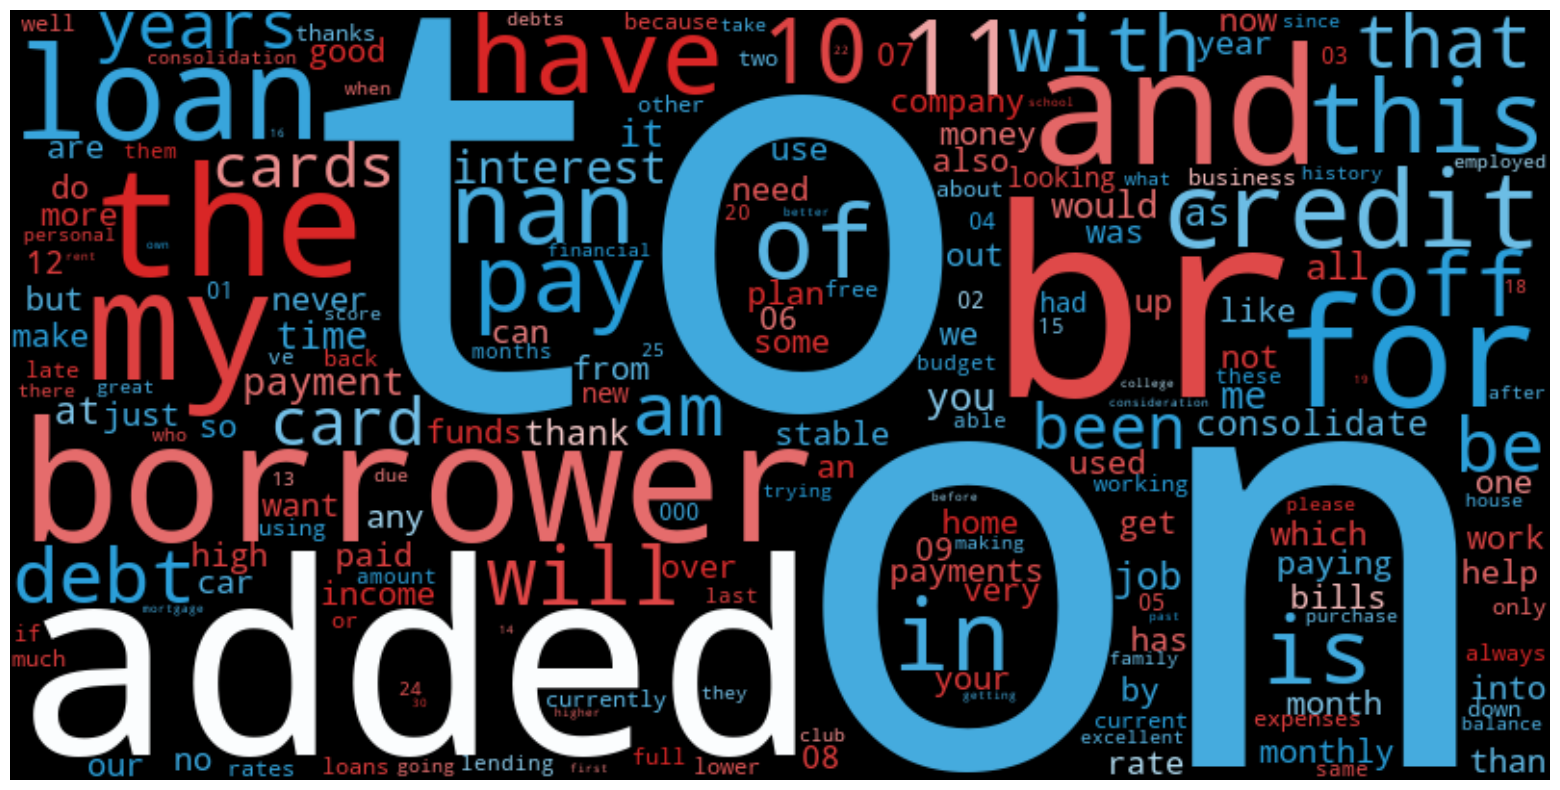

In [9]:
# ワードクラウドで可視化する。
# 閾値を設けてある一定の頻度のものだけ表示にしてもいいかも
# 今後Stopword除去も配慮する
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary where keys are words and values are corresponding wordcounts
wordcounts = dict(zip(df_word_summary['features'], df_word_summary['wordcounts']))

# Define a color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    coef = df_word_summary[df_word_summary['features'] == word]['coefs'].values[0]
    if coef > 0:
        return "hsl(0, 70%%, %d%%)" % (50 + coef * 100) # adjust these numbers to change color
    else:
        return "hsl(200, 70%%, %d%%)" % (50 - coef * 100) # adjust these numbers to change color

wordcloud = WordCloud(width=800, height=400, color_func=color_func,
                      prefer_horizontal=1.0).generate_from_frequencies(wordcounts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# making all features
class RunBlocks(Base):
    def __init__(self):
        self.feature_blocks = [*[ordinal_encoding_based_on_frequency_encoding(col) for col in
                    ["grade", "sub_grade","emp_length","home_ownership","verification_status",
                     "purpose","zip_code","addr_state",]]]
        self.stacked_predict_feature = [*[text_out_of_fold_prediction(col) for col in ["desc","title"]]]
        self.use_original_values = ["id","loan_amnt","funded_amnt","funded_amnt_inv","term",
                                "int_rate","installment","annual_inc"]
        
    def fit(self,input_df, df_y):
        output_df = pd.DataFrame()
        output_df = input_df[self.use_original_values]
                
        for block in self.feature_blocks:
            output_i = block.fit(input_df)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
        
        for block in self.stacked_predict_feature:
            output_i = block.fit(input_df,df_y)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
        return output_df
    
    def transform(self,input_df):
        output_df = pd.DataFrame()
        output_df = input_df[self.use_original_values]
        
        for block in self.feature_blocks:
            output_i = block.transform(input_df)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
            
        for block in self.stacked_predict_feature:
            output_i = block.transform(input_df)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
        return output_df
        
run_blocks = RunBlocks()
train = run_blocks.fit(df_train, df_train_y)
test = run_blocks.transform(df_test)
train



CV Score of Fold_0 is 0.5621454733431257
CV Score of Fold_1 is 0.5849046184527742
CV Score of Fold_2 is 0.5644234612520354
CV Score of Fold_3 is 0.5801739335316418
CV Score of Fold_4 is 0.5602623518472548
mean score is 0.5703819676853663
CV Score of Fold_0 is 0.5545176210018892
CV Score of Fold_1 is 0.5652061411074694
CV Score of Fold_2 is 0.5430641164269154
CV Score of Fold_3 is 0.5393033402474787
CV Score of Fold_4 is 0.5560955624650261
mean score is 0.5516373562497557


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,ordinal_grade,ordinal_sub_grade,ordinal_emp_length,ordinal_home_ownership,ordinal_verification_status,ordinal_purpose,ordinal_zip_code,ordinal_addr_state,predicted_desc,predicted_title
0,1038889,15000,15000,14950.000000,36,13.49,508.96,60000.0,4,29,6.0,4,1,6,413,48,0.497762,0.397512
1,797614,4000,4000,4000.000000,36,11.49,131.89,40000.0,6,30,4.0,4,1,13,704,34,0.658256,0.519057
2,493897,17500,17500,17500.000000,36,13.85,596.82,49270.0,4,21,10.0,4,2,12,772,49,0.318439,0.400828
3,852835,7200,7200,7200.000000,36,15.23,250.41,75000.0,4,20,1.0,3,0,11,802,44,0.490894,0.547564
4,468325,10000,10000,9900.000000,36,8.59,316.11,102000.0,5,33,4.0,4,2,11,804,49,0.416612,0.549656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,646158,5000,5000,5000.000000,36,12.98,168.43,24000.0,4,23,8.0,4,2,13,454,47,0.480026,0.501156
30857,364291,20000,20000,3191.430371,36,13.36,677.36,51996.0,3,17,10.0,4,2,13,729,39,0.426219,0.522297
30858,435338,8000,8000,7925.000000,36,15.31,278.53,97000.0,3,18,7.0,4,0,13,775,36,0.439757,0.570156
30859,438069,3000,3000,3000.000000,36,8.94,95.32,83957.0,5,32,6.0,3,1,13,793,47,0.503141,0.468463


モデリング

In [17]:
import lightgbm as lgb

class Config():
    random_seed = 71
    remove_columns=["id"]
    target_col="target"
    cv_fold=5
    early_stopping_rounds=100
    
    lgb_params = {'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': random_seed,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': 'warn',
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}

    
config = Config()
skf = StratifiedKFold(n_splits=config.cv_fold, shuffle=True, random_state=config.random_seed)
models =[]
use_cols = [col for col in train.columns if col not in config.remove_columns]


for k, (train_idx, valid_idx) in enumerate(skf.split(train, df_train_y)):
    print(f"CV fold{k}")
    X_train, y_train = train.loc[train_idx,use_cols], df_train_y[train_idx]
    X_valid, y_valid = train.loc[valid_idx,use_cols], df_train_y[valid_idx]
    model = lgb.LGBMClassifier(**config.lgb_params,force_row_wise=False)
    callbacks = [lgb.early_stopping(config.early_stopping_rounds)]
    
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=callbacks)
    models.append(model)
    

CV fold0
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 3608, number of negative: 21080
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2366
[LightGBM] [Info] Number of data points in the train set: 24688, number of used features: 17
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146144 -> initscore=-1.765171
[LightGBM] [Info] Start training from score -1.765171
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[80]	valid_0's binary_logloss: 0.3808
CV fold1
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 3

In [ ]:
# partial_dependence plot